In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq

from neurodsp.spectral import compute_spectrum
from timescales.sim import sim_spikes_synaptic
from timescales.est import compute_acf

In [2]:
np.random.seed(0)
n_seconds = 10
fs = 1000
tau = .025

probs, _ = sim_spikes_synaptic(n_seconds, fs, tau)

In [3]:
corrs = compute_acf(probs, 200)
corrs = (corrs - np.min(corrs)) / np.ptp(corrs)

_, powers_welch = compute_spectrum(probs, fs, method='welch')
corrs_welch = ifft(powers_welch).real
corrs_welch = corrs_welch[:100]
corrs_welch = corrs_welch / np.max(corrs_welch)
corrs_welch = (corrs_welch - np.min(corrs_welch)) / np.ptp(corrs_welch)
lags_welch = np.arange(0, (2 * len(corrs_welch)), 2)

_, powers_medfilt = compute_spectrum(probs, fs, method='medfilt')
corrs_medfilt = ifft(powers_medfilt).real
corrs_medfilt = corrs_medfilt[:100]
corrs_medfilt = (corrs_medfilt - np.min(corrs_medfilt)) / np.ptp(corrs_medfilt)
lags_medfilt = np.arange(0, (2 * len(corrs_medfilt)), 2)

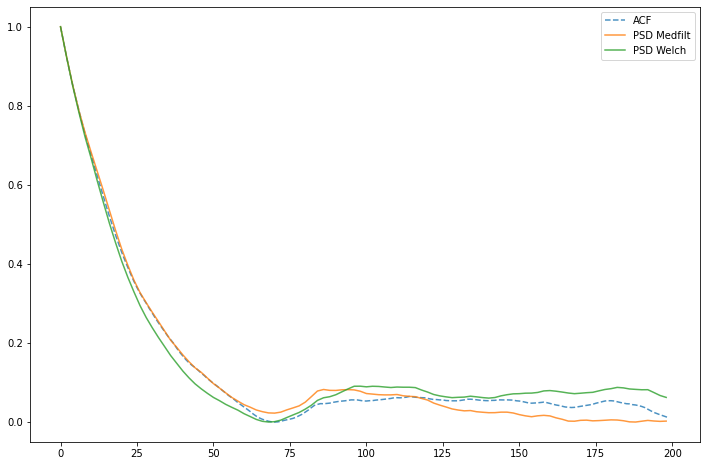

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(corrs, alpha=.8, label='ACF', ls='--')
plt.plot(lags_medfilt, corrs_medfilt, alpha=.8, label='PSD Medfilt')
plt.plot(lags_welch, corrs_welch, alpha=.8, label='PSD Welch')

plt.legend();